<h2>Interactive Experiment</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Here, you find an impelementation of Fitts experiment. </p>
<p style="text-align:justify">To start it, click into the first code-block and press the "Run" button at the top of this page.</p>
<p>A grey square will appear with a red bar with green tips. Always click and hold on the left green tip and traverese with your mouse through the red bar to the right green tip and release. Always from left to right. When everything turns green, the experiment is complete. Then you can click in the next code block and again press "Run" to show the results.</p>
</font>

In [33]:
from ipycanvas import Canvas
import numpy as np
import math
from ipywidgets import Label, HTML, HBox, Image, VBox, Box, HBox
from ipyevents import Event
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt


global_width = 800
global_height = 500
last_x, last_y = 0,0
paint = 0
mouseBorderWatcherActive = 0
color = 'black'



canvas = Canvas(width=global_width, height=global_height)



canvas.fill_style = 'gray'
canvas.fill_rect(0, 0, global_width, global_height)
        


 
   
def positionBars(distance, width):
    canvas.fill_style = 'gray'
    canvas.fill_rect(0, 0, global_width, global_height)
   
    canvas.fill_style = 'green'
    canvas.fill_rect((global_width/2)-((distance/2))-30,(global_height/2)-(width/2), distance+60, width)
    canvas.fill_style = 'red'
    canvas.fill_rect((global_width/2)-((distance/2)),(global_height/2)-(width/2), distance, width)
         
        

#paint the line
def addLine(x, y, color):
    global last_x, last_y     
    canvas.stroke_style = color
    canvas.stroke_line(last_x,last_y,x,y)
    last_x, last_y = x, y
    
    

def mouseBorderWatcher (x, y): 
    global paint
    global color
    global distance
    global width
    global indxWidth
    global indxRepeat
    global distanceArray
    global indxDist
    global widthArray

    global global_width
    global global_height
    global end
    global d_length
    global w_length
    global numRepeat
    
    
    if y < ((global_height/2)-(widthArray[indxWidth]/2)):
        
        paint = 0
        positionBars(distanceArray[indxDist], widthArray[indxWidth])
       
       
        
                
    if y > ((global_height/2)+(widthArray[indxWidth]/2)):
        
        paint = 0
        positionBars(distanceArray[indxDist], widthArray[indxWidth])
        
        
    if x > ((global_width/2)-(distanceArray[indxDist]/2)):
        #timestamp
        timestamps_end[indxDist, indxWidth, indxRepeat] = datetime.utcnow().timestamp()
        
        
    if x > ((global_width/2)+(distanceArray[indxDist]/2)):
       #timestamp
        timestamps_end[indxDist, indxWidth, indxRepeat] = datetime.utcnow().timestamp()
        paint = 0
        indxRepeat += 1
        mouseBorderWatcherActive = 0
        #if point was hit, go to next point
        if indxRepeat == numRepeat:  
            indxRepeat = 0
            indxDist += 1
            if indxDist == d_length:
                indxDist = 0
                indxWidth += 1
                if indxWidth == w_length:
                    canvas.fill_style = 'green'
                    canvas.fill_rect(0,0, global_width, global_height)
                    end = True
        positionBars(distanceArray[indxDist], widthArray[indxWidth])
        
       
        
   
    

    
def handle_mouse_down(x, y):
    global paint
    global mouseBorderWatcherActive
    
    global last_x, last_y
    last_x, last_y = x, y
    
    timestamps_start[indxDist, indxWidth, indxRepeat] = datetime.utcnow().timestamp()
    
    if paint == 0:
        paint = 1
        mouseBorderWatcherActive = 1 
    
    else:
        paint = 0
        mouseBorderWatcherActive = 0

        
        
        
def handle_mouse_move(x, y):
    global paint
    global mouseBorderWatcherActive
    
    if paint == 1:
        mouseBorderWatcher(x,y)
        addLine (x,y,color)
       
    
    
    

   ## if end:
     #   return False
    
    
    
   # pass

canvas.on_mouse_down(handle_mouse_down)
canvas.on_mouse_move(handle_mouse_move)



#initialize
distanceArray = [100, 200, 400]
widthArray = [20, 40, 80]
d_length = len(distanceArray)
w_length = len(widthArray)
indxDist = 0
indxWidth = 0
indxRepeat = 0
numRepeat = 5
timestamps_end = np.zeros((d_length,w_length,numRepeat))
timestamps_start = np.zeros((d_length,w_length,numRepeat))
end = False

width = widthArray[indxWidth]
distance = distanceArray[indxDist]
IndxWidth = 0
positionBars(distance, width)





canvas

Canvas(width=800)

<ipython-input-34-66f1f6d818c8>:31: RuntimeWarning: divide by zero encountered in double_scalars
  indxOfPerformance[i*w_length+j] = round(indxOfDifficulty[i*w_length+j]/averageDeltaTimes[i][j],4)


RESULT
Distance in pixel | Width in pixel | Time in seconds | Index of difficulty | Index of Performance 
100                 20               0.0            3.3219                inf
100                 40               0.0            2.3219                inf
100                 80               0.0            1.3219                inf
200                 20               0.0            4.3219                inf
200                 40               0.0            3.3219                inf
200                 80               0.0            2.3219                inf
400                 20               0.0            5.3219                inf
400                 40               0.0            4.3219                inf
400                 80               0.0            3.3219                inf


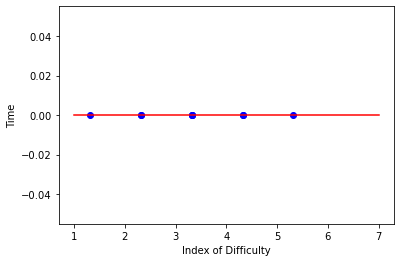

Device specific constants:
a:  0.0
b:  0.0


In [34]:
#compute differences between click and finish
deltaTimes = np.zeros((d_length,w_length,numRepeat))
for i in range(d_length):
    for j in range(w_length):
        for t in range(numRepeat):
            #deltaTimes[i,j,t] = timestamps[i,j,t+1] - timestamps[i,j,t]
            deltaTimes[i,j,t] = timestamps_end[i,j,t] - timestamps_start[i,j,t]


#compute average time between click and finish for each condition
averageDeltaTimes = np.zeros((d_length,w_length))
for i in range(d_length):
    for j in range(w_length):
        sum = 0.0
        for t in range(numRepeat-1):
            sum += deltaTimes[i,j,t]
        averageDeltaTimes[i,j] = round(sum/(numRepeat-1),4)
        
        
#compute index of difficulty for each condition
indxOfDifficulty = np.zeros((d_length*w_length))
for i in range(d_length):
    for j in range(w_length):
        indxOfDifficulty[i*w_length+j] = round(distanceArray[i] / widthArray[j],4)
        
        


print("RESULT")
print("Distance in pixel | Width in pixel | Time in seconds | Index of difficulty  ")
for i in range(d_length):
    for j in range(w_length): 
        print(distanceArray[i], "               ", widthArray[j], "             ", averageDeltaTimes[i,j], "          ", indxOfDifficulty[i*w_length+j])


        

times = averageDeltaTimes.flatten()

#compute linear regression
IDmatrix = np.ones((len(indxOfDifficulty), 2))
IDmatrix[:,1] = indxOfDifficulty
ABmatrix = np.linalg.pinv(IDmatrix).dot(times)

xLine = np.arange(1, 20, 1)

#Plot Experiment result with linear regression
plt.plot(indxOfDifficulty, times, 'bo', xLine, ABmatrix[0]+ABmatrix[1]*xLine, 'r')
plt.xlabel('Index of Difficulty')
plt.ylabel('Time')
plt.show()

print("Device specific constants:")
print("a: ", ABmatrix[0])
print("b: ", ABmatrix[1])